In [2]:
lung_ca <- read.csv ("lung_cancer.csv")
head (lung_ca)
str (lung_ca)

,pid,age,gender,race,smoker,days_to_cancer,stage_of_cancer
,<int>,<int>,<chr>,<chr>,<chr>,<int>,<chr>
1,100001,70,Male,White,Current,NA,
2,100002,66,Male,White,Current,NA,
3,100003,64,Male,White,Current,NA,
4,100004,60,Male,White,Former,NA,
5,100005,64,Male,White,Former,NA,
6,100006,56,Female,White,Current,NA,


'data.frame':	53427 obs. of  7 variables:
 $ pid            : int  100001 100002 100003 100004 100005 100006 100007 100008 100009 100010 ...
 $ age            : int  70 66 64 60 64 56 69 56 55 68 ...
 $ gender         : chr  "Male" "Male" "Male" "Male" ...
 $ race           : chr  "White" "White" "White" "White" ...
 $ smoker         : chr  "Current" "Current" "Current" "Former" ...
 $ days_to_cancer : int  NA NA NA NA NA NA NA NA NA NA ...
 $ stage_of_cancer: chr  "" "" "" "" ...


In [3]:
race_mapping <- c(
  "White" = "WHT",
  "Black or African American" = "BLK",
  "American Indian or Alaska Native" = "AIN",
  "Asian" = "ASN",
  "Native Hawaiian or Other Pacific Islander" = "NHPI",
  "Other Race" = "OTH",
  "American Indian or Alaskan Native" = "AIAN", # Updated code
  "Black or African-American" = "BAA",  # Updated code
  "Participant refused to answer" = "PRA",
  "More than one race" = "MTO"  # New code
)

install.packages ("dplyr")
library(dplyr)

lung_ca <- lung_ca %>%
  mutate(race = recode(race, !!!race_mapping))
table(lung_ca$race)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union





 AIAN   ASN   BAA   MTO   N/A  NHPI   PRA   WHT 
  190  1095  2375   678   261   192   109 48527 

In [4]:
table (lung_ca$race)


 AIAN   ASN   BAA   MTO   N/A  NHPI   PRA   WHT 
  190  1095  2375   678   261   192   109 48527 

In [5]:
lung_ca$gender <- as.factor(lung_ca$gender)
lung_ca$race <- as.factor(lung_ca$race)
lung_ca$smoker <- as.factor(lung_ca$smoker)

str (lung_ca)

'data.frame':	53427 obs. of  7 variables:
 $ pid            : int  100001 100002 100003 100004 100005 100006 100007 100008 100009 100010 ...
 $ age            : int  70 66 64 60 64 56 69 56 55 68 ...
 $ gender         : Factor w/ 2 levels "Female","Male": 2 2 2 2 2 1 2 1 2 2 ...
 $ race           : Factor w/ 8 levels "AIAN","ASN","BAA",..: 8 8 8 8 8 8 8 8 8 8 ...
 $ smoker         : Factor w/ 2 levels "Current","Former": 1 1 1 2 2 1 1 1 1 2 ...
 $ days_to_cancer : int  NA NA NA NA NA NA NA NA NA NA ...
 $ stage_of_cancer: chr  "" "" "" "" ...


In [6]:
lung_ca$days_to_cancer[is.na(lung_ca$days_to_cancer)] <- 2555

summary (lung_ca$days_to_cancer)

sum(lung_ca$days_to_cancer > 2555)

lung_ca$pid[lung_ca$days_to_cancer > 2555]

lung_ca$days_to_cancer[lung_ca$pid %in% c(124630, 206161, 206398)]

lung_ca$status[lung_ca$pid %in% c(124630, 206161, 206398)]

lung_ca$status[lung_ca$pid %in% c(124630, 206161, 206398)] <- 0

lung_ca$status[lung_ca$pid %in% c(124630, 206161, 206398)]



   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      0    2555    2555    2498    2555    2618 

[1] 3

[1] 124630 206161 206398

[1] 2583 2580 2618

NULL

[1] 0 0 0

In [7]:
lung_ca$status <- ifelse(lung_ca$days_to_cancer == 2555, 0, 1)

str (lung_ca)

'data.frame':	53427 obs. of  8 variables:
 $ pid            : int  100001 100002 100003 100004 100005 100006 100007 100008 100009 100010 ...
 $ age            : int  70 66 64 60 64 56 69 56 55 68 ...
 $ gender         : Factor w/ 2 levels "Female","Male": 2 2 2 2 2 1 2 1 2 2 ...
 $ race           : Factor w/ 8 levels "AIAN","ASN","BAA",..: 8 8 8 8 8 8 8 8 8 8 ...
 $ smoker         : Factor w/ 2 levels "Current","Former": 1 1 1 2 2 1 1 1 1 2 ...
 $ days_to_cancer : num  2555 2555 2555 2555 2555 ...
 $ stage_of_cancer: chr  "" "" "" "" ...
 $ status         : num  0 0 0 0 0 0 0 0 0 0 ...


In [8]:
# Convert to factor
lung_ca$stage_of_cancer <- as.factor(lung_ca$stage_of_cancer)

str (lung_ca)

summary (lung_ca$stage_of_cancer)

# Add "NoCA" as a level in your factor
levels(lung_ca$stage_of_cancer) <- c(levels(lung_ca$stage_of_cancer), "NoCA")

# Now replace NA values with "NoCA"
lung_ca$stage_of_cancer[is.na(lung_ca$stage_of_cancer)] <- "NoCA"

summary (lung_ca$stage_of_cancer)

levels(lung_ca$stage_of_cancer)[levels(lung_ca$stage_of_cancer) == ""] <- "NoCA"

summary (lung_ca$stage_of_cancer)

str (lung_ca)

'data.frame':	53427 obs. of  8 variables:
 $ pid            : int  100001 100002 100003 100004 100005 100006 100007 100008 100009 100010 ...
 $ age            : int  70 66 64 60 64 56 69 56 55 68 ...
 $ gender         : Factor w/ 2 levels "Female","Male": 2 2 2 2 2 1 2 1 2 2 ...
 $ race           : Factor w/ 8 levels "AIAN","ASN","BAA",..: 8 8 8 8 8 8 8 8 8 8 ...
 $ smoker         : Factor w/ 2 levels "Current","Former": 1 1 1 2 2 1 1 1 1 2 ...
 $ days_to_cancer : num  2555 2555 2555 2555 2555 ...
 $ stage_of_cancer: Factor w/ 8 levels "","IA","IB","IIA",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ status         : num  0 0 0 0 0 0 0 0 0 0 ...


IA    IB   IIA   IIB  IIIA  IIIB    IV 
51395   621   210    67    79   213   246   596

IA    IB   IIA   IIB  IIIA  IIIB    IV  NoCA 
51395   621   210    67    79   213   246   596     0

NoCA    IA    IB   IIA   IIB  IIIA  IIIB    IV 
51395   621   210    67    79   213   246   596

'data.frame':	53427 obs. of  8 variables:
 $ pid            : int  100001 100002 100003 100004 100005 100006 100007 100008 100009 100010 ...
 $ age            : int  70 66 64 60 64 56 69 56 55 68 ...
 $ gender         : Factor w/ 2 levels "Female","Male": 2 2 2 2 2 1 2 1 2 2 ...
 $ race           : Factor w/ 8 levels "AIAN","ASN","BAA",..: 8 8 8 8 8 8 8 8 8 8 ...
 $ smoker         : Factor w/ 2 levels "Current","Former": 1 1 1 2 2 1 1 1 1 2 ...
 $ days_to_cancer : num  2555 2555 2555 2555 2555 ...
 $ stage_of_cancer: Factor w/ 8 levels "NoCA","IA","IB",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ status         : num  0 0 0 0 0 0 0 0 0 0 ...


In [9]:
sum (is.na(lung_ca$days_to_cancer))
sum (is.na (lung_ca$stage_of_cancer))

[1] 0

[1] 0

In [10]:
table (lung_ca$gender)
table (lung_ca$race)
table (lung_ca$smoker)
table (lung_ca$stage_of_cancer)


Female   Male 
 21910  31517 


 AIAN   ASN   BAA   MTO   N/A  NHPI   PRA   WHT 
  190  1095  2375   678   261   192   109 48527 


Current  Former 
  25747   27680 


 NoCA    IA    IB   IIA   IIB  IIIA  IIIB    IV 
51395   621   210    67    79   213   246   596 

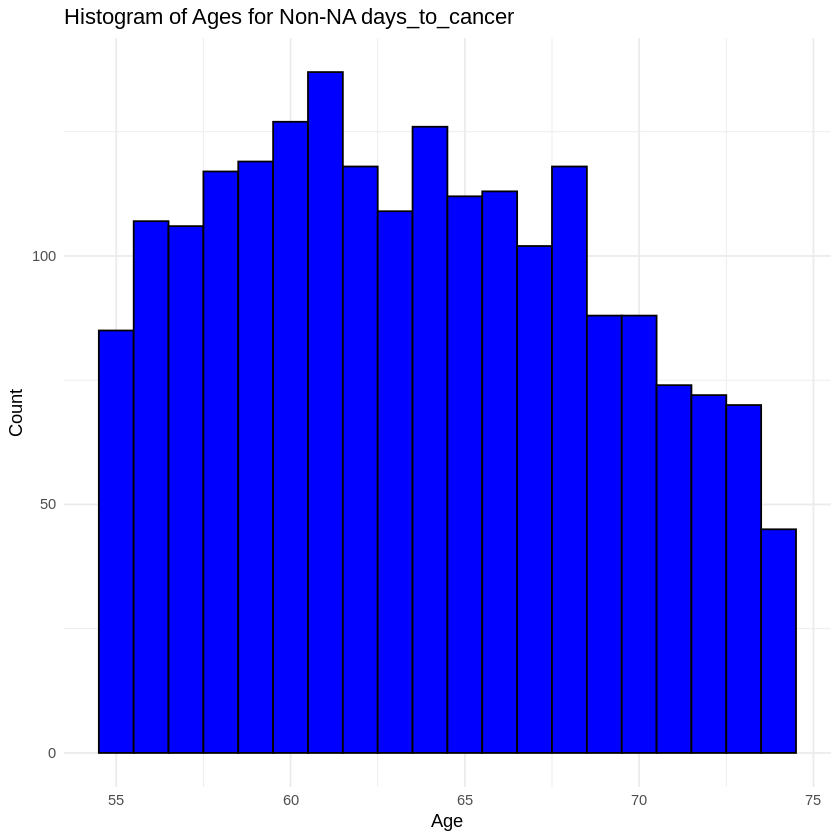

In [11]:
library(ggplot2)

fd <- lung_ca[lung_ca$status == 1, ]

# Create the histogram
ggplot(fd, aes(x = age)) +
  geom_histogram(binwidth = 1, fill = "blue", color = "black") +
  labs(title = "Histogram of Ages for Non-NA days_to_cancer",
       x = "Age",
       y = "Count") +
  theme_minimal()


In [12]:
# person in percent that don't have lung CA
(1-((sum(lung_ca$status == 1))/nrow (lung_ca)))*100

[1] 96.19481

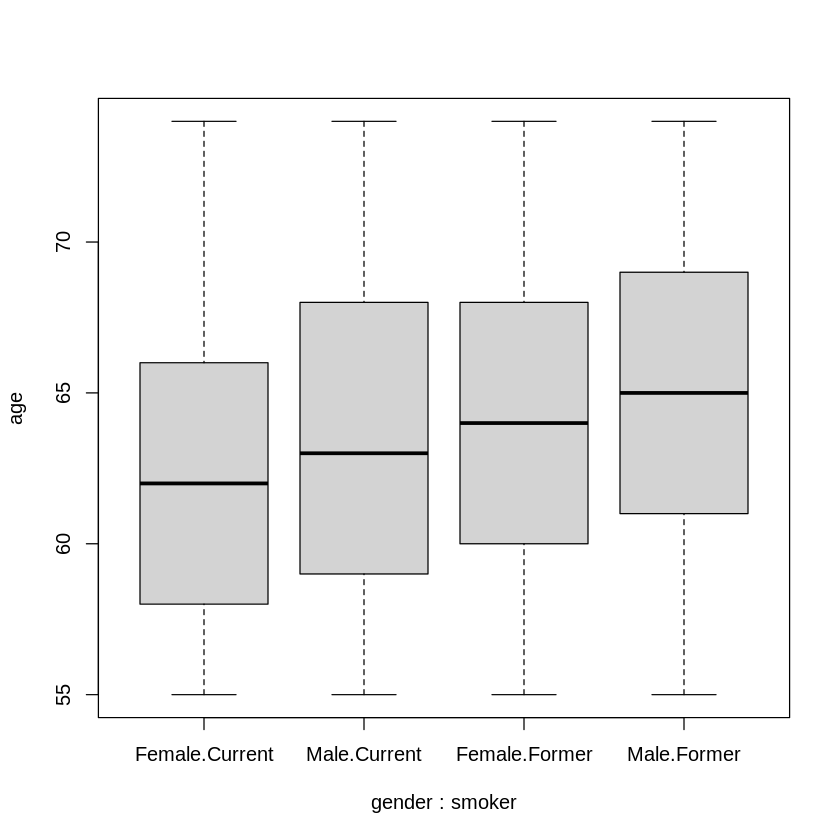

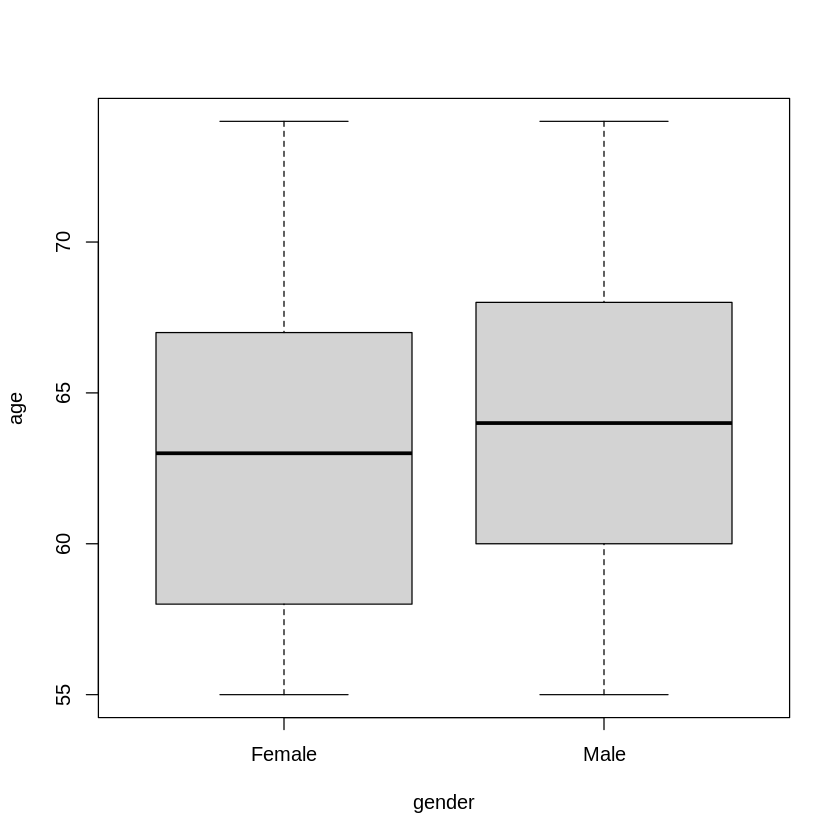

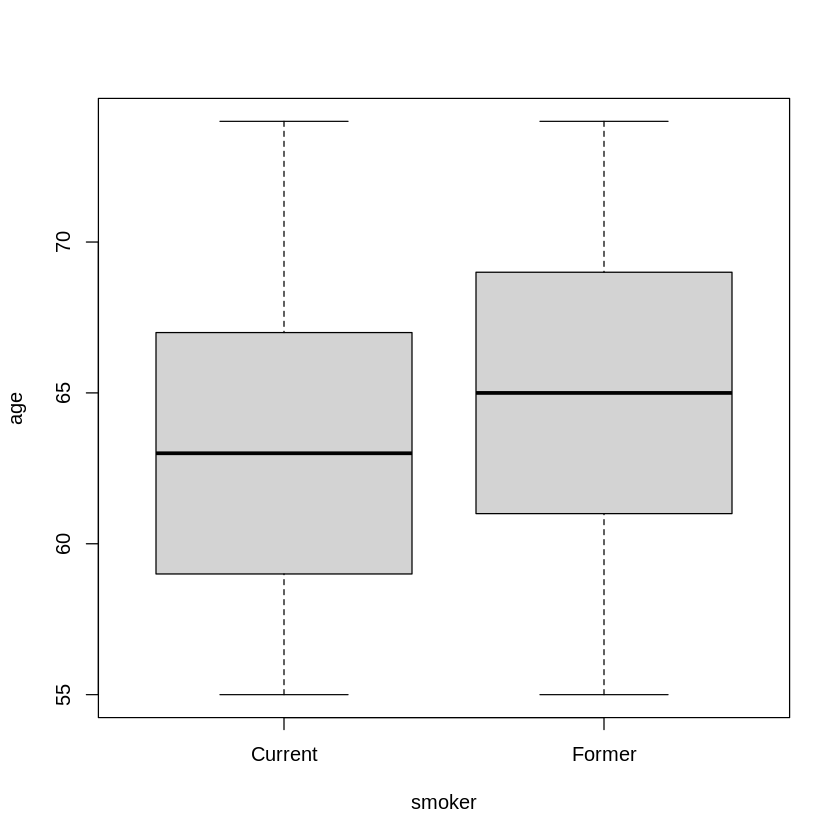

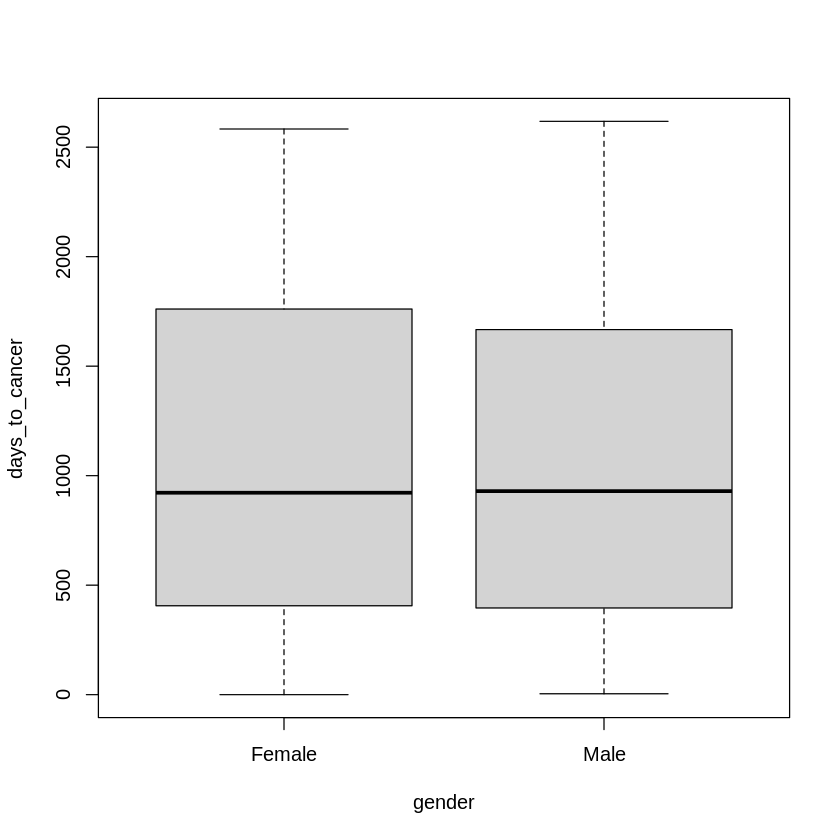

In [13]:
boxplot (age ~ gender*smoker, data = fd)
boxplot (age ~ gender, data = fd)
boxplot (age ~ smoker, data = fd)
boxplot (days_to_cancer ~ gender, data = fd)

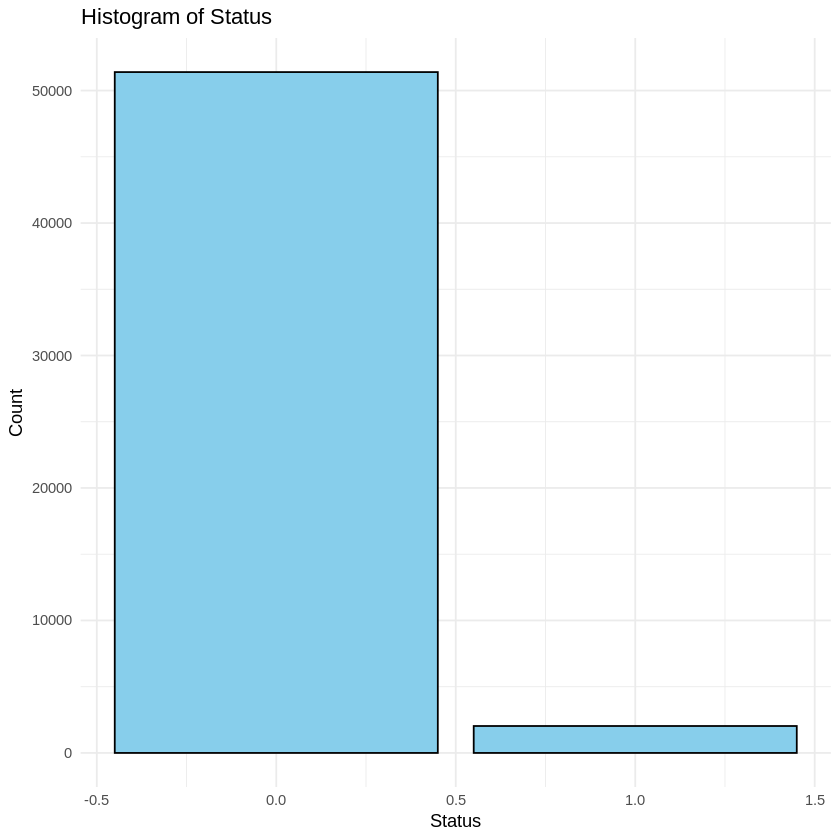

In [14]:
library(ggplot2)

# Create the histogram
ggplot(lung_ca, aes(x = status)) +
  geom_bar(fill = "skyblue", color = "black") +
  labs(title = "Histogram of Status",
       x = "Status",
       y = "Count") +
  theme_minimal()

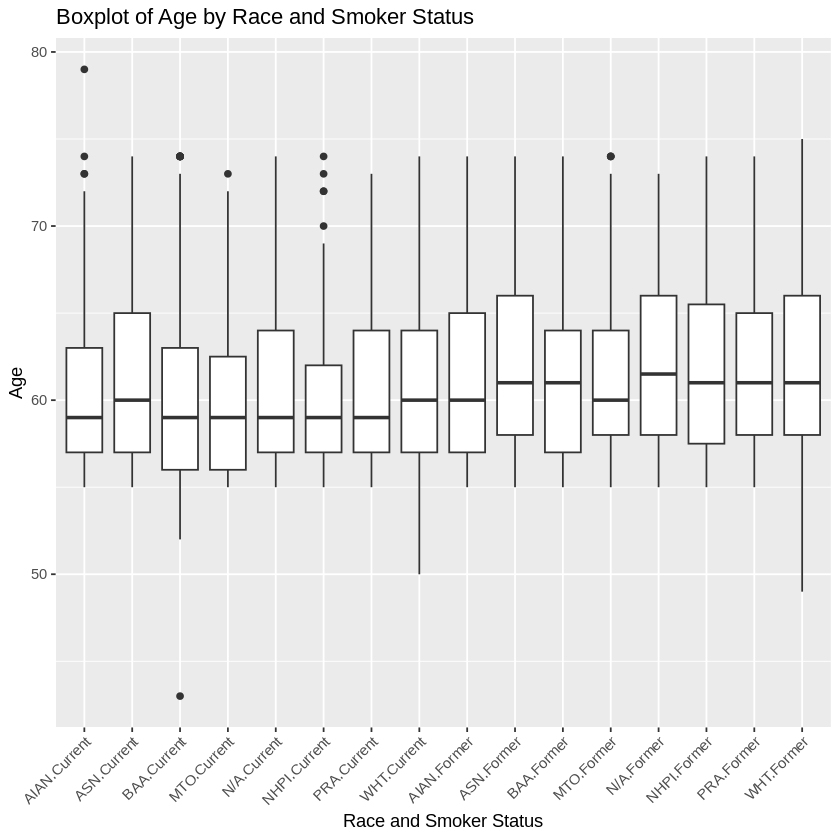

In [15]:
library(ggplot2)

ggplot(lung_ca, aes(x = interaction(race, smoker), y = age)) +
  geom_boxplot() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +  # Rotate x-axis labels
  labs(title = "Boxplot of Age by Race and Smoker Status",
       x = "Race and Smoker Status",
       y = "Age")

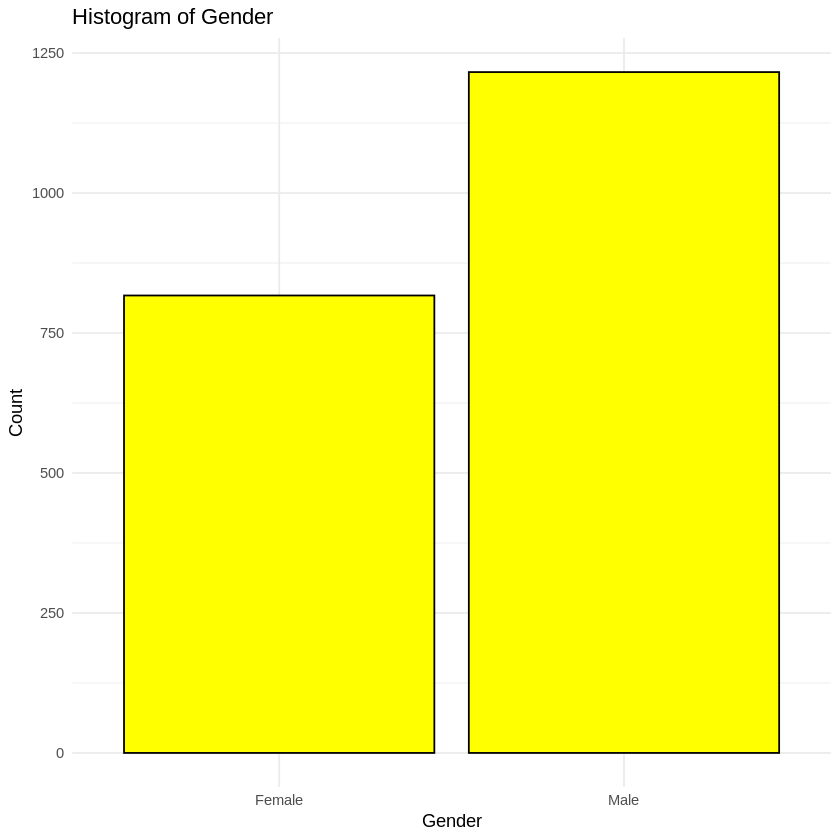

In [16]:
library(ggplot2)

# Create the histogram
ggplot(fd, aes(x = gender)) +
  geom_bar(fill = "yellow", color = "black") +  # Use geom_bar for categorical data
  labs(title = "Histogram of Gender",
       x = "Gender",
       y = "Count") +
  theme_minimal()

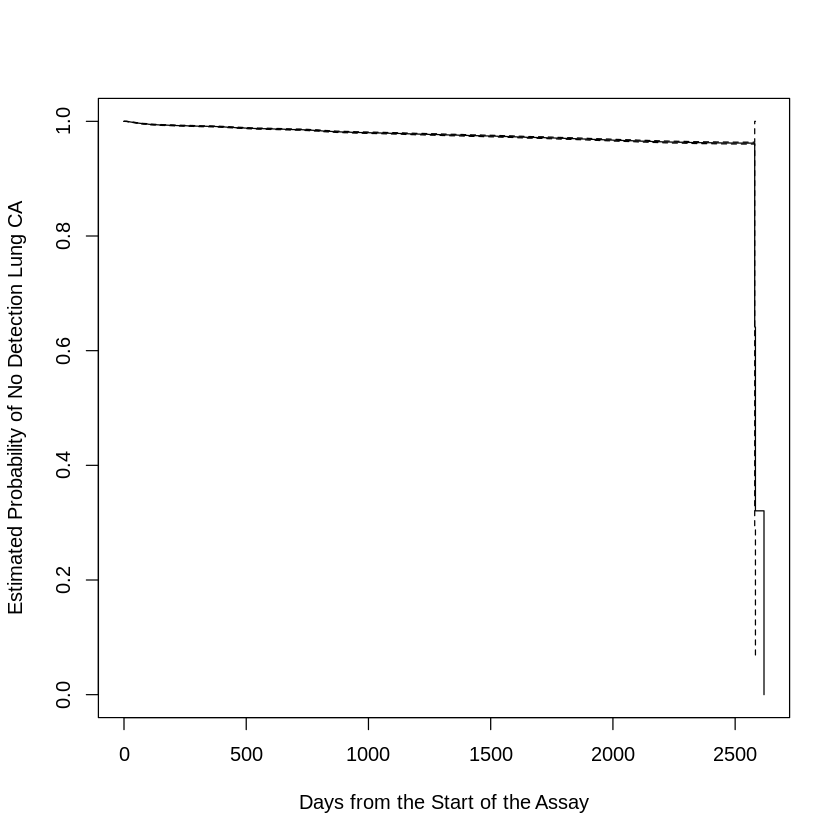

In [17]:
library (survival)

attach (lung_ca)

fit.surv <- survfit(Surv(days_to_cancer, status) ~ 1)

plot (fit.surv, xlab = "Days from the Start of the Assay",
    ylab = "Estimated Probability of No Detection Lung CA")



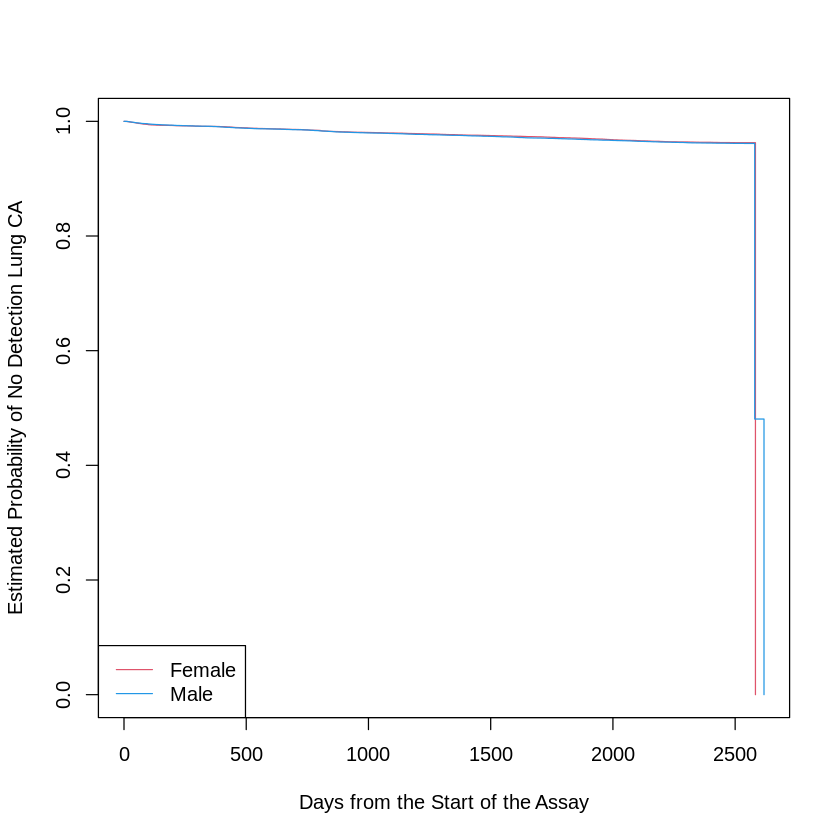

In [18]:
fit.sex <- survfit (Surv (days_to_cancer, status) ~ gender)

plot (fit.sex , xlab = "Days from the Start of the Assay",
    ylab = "Estimated Probability of No Detection Lung CA", col =
      c(2,4))
legend ("bottomleft", levels (gender), col = c(2,4), lty = 1)

In [19]:
logrank.test <- survdiff (Surv (days_to_cancer, status) ~ gender)

logrank.test

Call:
survdiff(formula = Surv(days_to_cancer, status) ~ gender)

                  N Observed Expected (O-E)^2/E (O-E)^2/V
gender=Female 21910      817      834     0.332     0.563
gender=Male   31517     1216     1199     0.231     0.563

 Chisq= 0.6  on 1 degrees of freedom, p= 0.5 

In [20]:
fit.all <- coxph (Surv (days_to_cancer, status) ~ gender +
    age + race + smoker)

fit.all

Call:
coxph(formula = Surv(days_to_cancer, status) ~ gender + age + 
    race + smoker)

                  coef exp(coef)  se(coef)       z      p
genderMale    0.019093  1.019276  0.045350   0.421 0.6737
age           0.089830  1.093988  0.004097  21.927 <2e-16
raceASN      -0.540243  0.582607  0.357773  -1.510 0.1310
raceBAA      -0.217678  0.804385  0.331420  -0.657 0.5113
raceMTO      -0.457224  0.633039  0.384265  -1.190 0.2341
raceN/A      -0.229533  0.794905  0.436937  -0.525 0.5994
raceNHPI     -0.906478  0.403944  0.591621  -1.532 0.1255
racePRA      -1.769286  0.170455  1.048818  -1.687 0.0916
raceWHT      -0.327914  0.720425  0.317100  -1.034 0.3011
smokerFormer -0.616245  0.539968  0.045833 -13.446 <2e-16

Likelihood ratio test=598.3  on 10 df, p=< 2.2e-16
n= 53427, number of events= 2033 

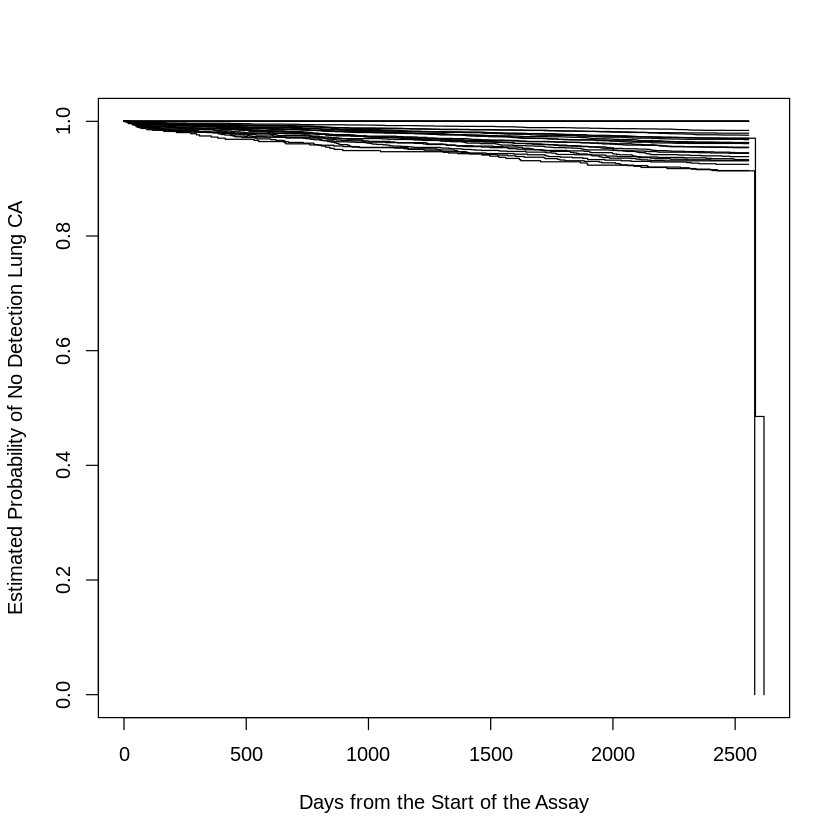

In [21]:
fit.age <- survfit (Surv (days_to_cancer, status) ~ age)

plot (fit.age , xlab = "Days from the Start of the Assay",
    ylab = "Estimated Probability of No Detection Lung CA")

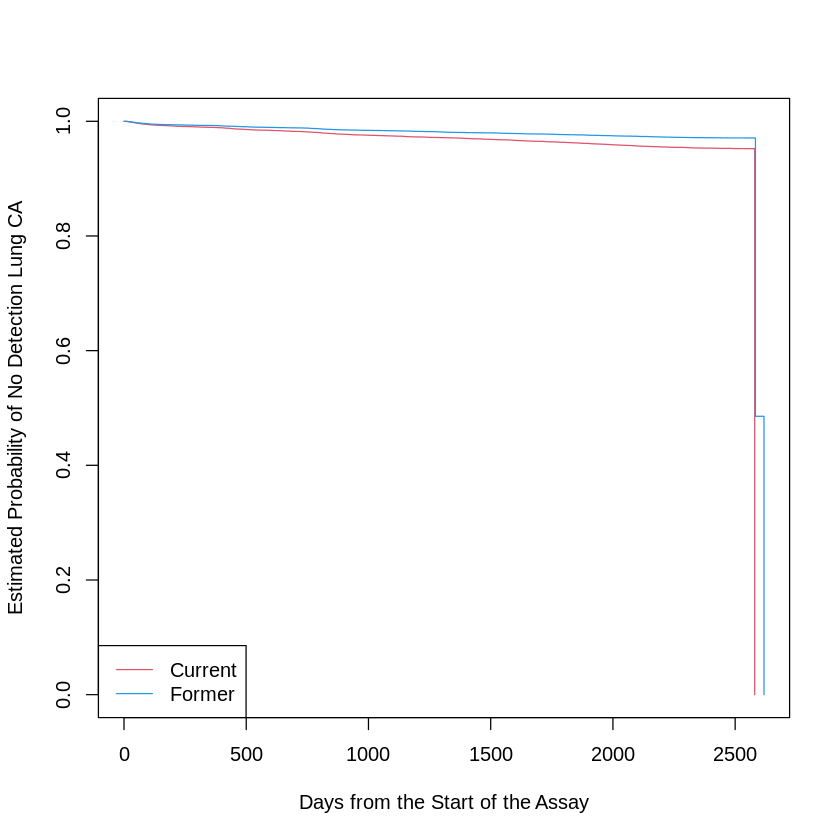

Warning message in .get_data(model, data = data):
“The `data` argument is not provided. Data will be extracted from model fit.”


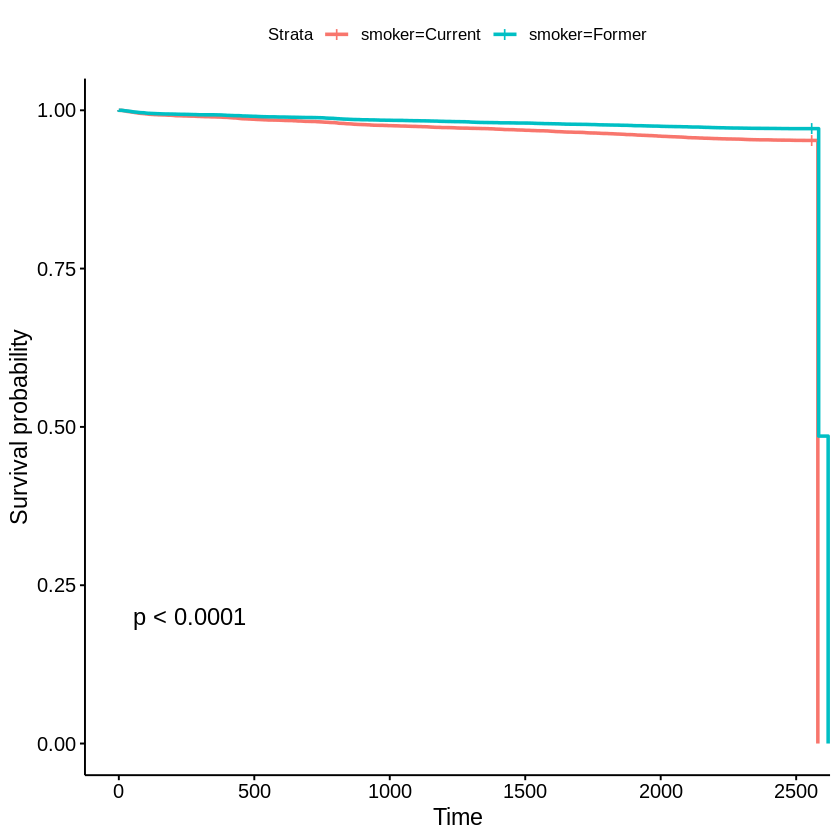

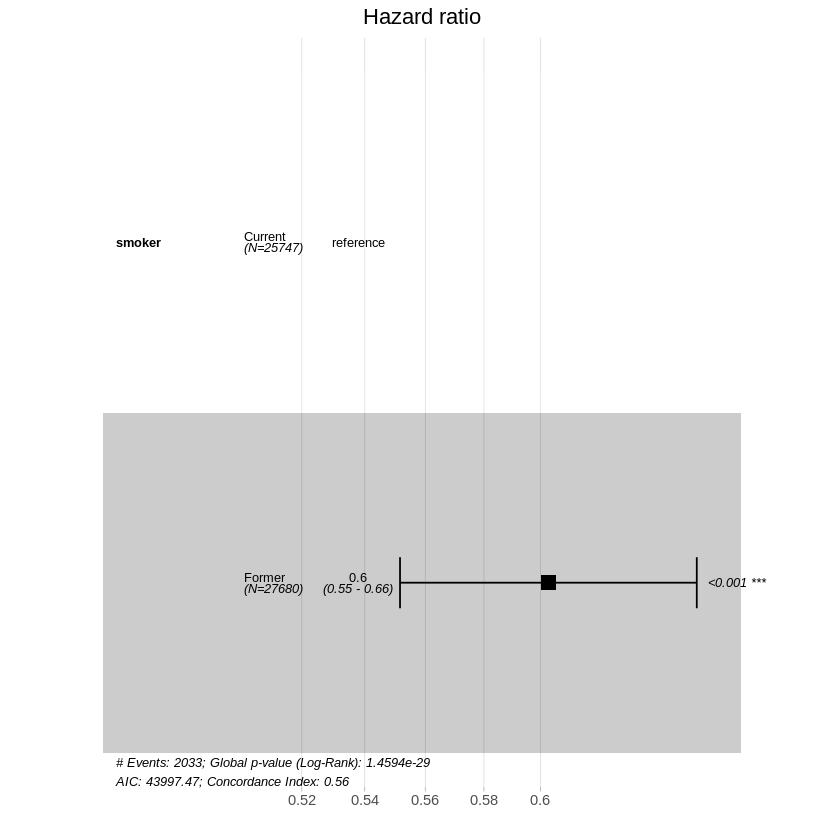

In [25]:
fit.smoker <- survfit (Surv (days_to_cancer, status) ~ smoker, data = lung_ca)

plot (fit.smoker , xlab = "Days from the Start of the Assay",
    ylab = "Estimated Probability of No Detection Lung CA", col =
      c(2,4))
legend ("bottomleft", levels (smoker), col = c(2,4), lty = 1)

library (survminer)

ggsurvplot (fit.smoker, pval=T)

ggforest (coxph(Surv(days_to_cancer, status)~ smoker, data = lung_ca))

The *Former* observations have more likelihood of **no detection**.